In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [53]:
n = 1000
p = 1
fct = 2
betas = [0.5, 1.0]
X = np.random.randn(n, p);
Xw1 = np.concatenate((np.ones((n, 1)), X), axis=1)
Y = Xw1 @ betas + np.random.randn(n)*np.abs(X).sum(axis=-1)*fct;

Xtest = np.random.randn(n, p);
Xw1test = np.concatenate((np.ones((n, 1)), Xtest), axis=1)
Ytest = Xw1test @ betas + np.random.randn(n)*np.abs(Xtest).sum(axis=-1)*fct;

EY2X = (fct*Xtest.reshape(-1))**2 + (Xw1test @ betas)**2;

In [54]:
fit1 = SVR(kernel='rbf').fit(X, Y)
estYsq = fit1.predict(Xtest)**2

fit2 = SVR(kernel="rbf").fit(X, Y**2)
estYsq2 = fit2.predict(Xtest);

err1 = np.mean((EY2X - estYsq)**2)
err2 = np.mean((EY2X - estYsq2)**2);
err1, err2


(63.25943145258858, 37.04721244426812)

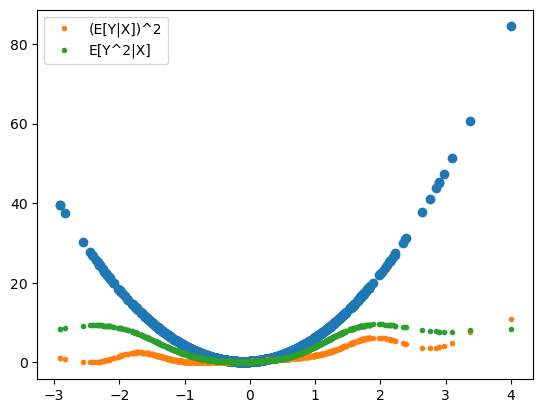

In [55]:
plt.plot(Xtest, EY2X, 'o')
plt.plot(Xtest, estYsq, '.', label='(E[Y|X])^2')
plt.plot(Xtest, estYsq2, '.', label='E[Y^2|X]')
plt.legend()